## Title

**Authors:** <br>
Björn Hahn () <br>
Domenico Ferraro ()<br>
Justus Raabe () <br>
Lisa Sachau ()

#### Imported Packages

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#### Load Data

['./Fotos_einfach\\manul\\m1.jpg', './Fotos_einfach\\manul\\m10.jpg', './Fotos_einfach\\manul\\m2.jpg', './Fotos_einfach\\manul\\m3.jpg', './Fotos_einfach\\manul\\m4.jpg', './Fotos_einfach\\manul\\m5.jpg', './Fotos_einfach\\manul\\m6.jpg', './Fotos_einfach\\manul\\m7.jpg', './Fotos_einfach\\manul\\m8.jpg', './Fotos_einfach\\manul\\m9.JPG', './Fotos_einfach\\sand cat\\s1.jpg', './Fotos_einfach\\sand cat\\s10.jpg', './Fotos_einfach\\sand cat\\s2.jpg', './Fotos_einfach\\sand cat\\s3.jpg', './Fotos_einfach\\sand cat\\s4.jpg', './Fotos_einfach\\sand cat\\s5.jpg', './Fotos_einfach\\sand cat\\s6.jpg', './Fotos_einfach\\sand cat\\s7.jpg', './Fotos_einfach\\sand cat\\s8.JPG', './Fotos_einfach\\sand cat\\s9.jpg']
['manul', 'manul', 'manul', 'manul', 'manul', 'manul', 'manul', 'manul', 'manul', 'manul', 'sand cat', 'sand cat', 'sand cat', 'sand cat', 'sand cat', 'sand cat', 'sand cat', 'sand cat', 'sand cat', 'sand cat']
['manul', 'sand cat']
Shape of images array: (20, 200, 200, 3)


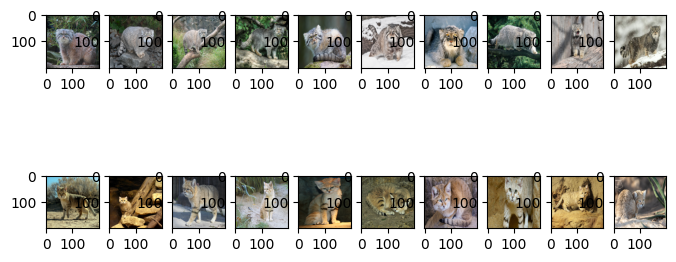

In [2]:

def get_filenames_labels(folder):
    ''' Detects categories, filenames and labels of images
        Arguments
        ---------
        folder: string
            The folder where the images reside in subfolders. Subfolders correspond to the categories.

        Returns
        -------
        categories : list
            A list with all categories
        filenames: list
            A list of list of filenames of the images
        labels: list
            A list of list of the categories corresponding to filenames
    '''
    categories = [f.name for f in os.scandir(folder) if f.is_dir()]
    filenames = []
    labels = []
    for category in categories: 
        subfolder = os.path.join(folder, category)
        fnames = get_filenames(subfolder)
        filenames.append(fnames)
        labels.append([category] * len(fnames))

    return categories, flatten_lst(filenames), flatten_lst(labels)

def get_filenames(subfolder):
    imagefiles = [os.path.join(subfolder, filename) for filename in os.listdir(subfolder) if os.path.isdir(subfolder)] ## wo ist der Fehler?
    #imagefiles = [f for f in glob.glob(filepath+'*.jpg')]
    return imagefiles    

# Label list
def flatten_lst(lst):
    return [item for items in lst for item in items] # items = innere Liste in der äußeren Liste item = Element in innerer Liste


def read_images(filenames, height=None, width=None):
    images = [Image.open(filename) for filename in filenames]
    if (not height is None) and (not width is None):
        images = [img.resize((width, height)) for img in images]
    return images

def images_to_array(images):
    return np.asarray([np.asarray(img) for img in images])


# Get file names
folder = './Fotos_einfach'
#image_names, categories = read_image_names(filepath)
categories, image_names, labels = get_filenames_labels(folder)
print(image_names)
print(labels)
print(categories)
# Load images
input_shape = {
    "height": 200,
    "width": 200,
    "channels": 3
}
images = read_images(image_names, height=input_shape["height"], width=input_shape["width"])
# Convert images to array
aimages = images_to_array(images)
print(f'Shape of images array: {aimages.shape}')
# Plot images array
#display(Image.fromarray(aimages[11]))
fig = plt.figure(figsize=(8, 8))
rows, columns = 4, 10
for i in range(aimages.shape[0]):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aimages[i, ...])
plt.show()


Data Augmentation

In [ ]:
#Data Augmentation here